# TASK 1

# QUIN F

In [ ]:
#Setting up environment

In [ ]:
#pip install pandas matplotlib seaborn

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [3]:
# Loading of dataset
data_june = pd.read_csv('Test_Data_C_2014_06_30.csv')

#first few rows to confirm it's loaded correctly
print(data_june.head())

   Unnamed: 0  ID Dlq_stat      amounts             obs_date  Dlq_days  \
0           1  F1  Current   389.628333  2014-06-30 12:00:00       NaN   
1           2  F2  Current  2446.128333  2014-06-30 12:00:00       NaN   
2           3  F3  Current  2874.366667  2014-06-30 12:00:00       NaN   
3           4  F4  Current   299.626667  2014-06-30 12:00:00       NaN   
4           5  F5  Current   745.455000  2014-06-30 12:00:00       NaN   

          Vertical1        Province1  
0  Home Improvement               ON  
1           Vehicle               AB  
2  Home Improvement               ON  
3  Home Improvement               ON  
4  Home Improvement  Other Provinces  


# Data Cleaning

In [5]:
#1 dropping unnamed or unnecessary columns if present
data_june.drop(columns=[col for col in data_june.columns if 'Unnamed' in col], inplace=True)

#check for missing values
print(data_june.isnull().sum())


ID               0
Dlq_stat         0
amounts          0
obs_date         0
Dlq_days     13281
Vertical1        0
Province1        0
dtype: int64


In [6]:
print(data_june.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13386 entries, 0 to 13385
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         13386 non-null  object 
 1   Dlq_stat   13386 non-null  object 
 2   amounts    13386 non-null  float64
 3   obs_date   13386 non-null  object 
 4   Dlq_days   105 non-null    float64
 5   Vertical1  13386 non-null  object 
 6   Province1  13386 non-null  object 
dtypes: float64(2), object(5)
memory usage: 732.2+ KB
None


In [7]:
#basic statistics to understand distribution
print(data_june.describe())

            amounts    Dlq_days
count  13386.000000  105.000000
mean    1954.159647   26.104762
std     1792.649704   25.894729
min        0.000000    0.000000
25%      857.592083    4.000000
50%     1460.785000   15.000000
75%     2356.990417   46.000000
max    16611.375000   79.000000


In [9]:
#2 handling missing values 
#Dlq_days-have missing values for loans that are not delinquent

#fill missing 'Dlq_days' with 0 since these loans are presumably current
data_june['Dlq_days'].fillna(0, inplace=True)
#print(data_june)


           ID    Dlq_stat      amounts             obs_date  Dlq_days  \
0          F1     Current   389.628333  2014-06-30 12:00:00       0.0   
1          F2     Current  2446.128333  2014-06-30 12:00:00       0.0   
2          F3     Current  2874.366667  2014-06-30 12:00:00       0.0   
3          F4     Current   299.626667  2014-06-30 12:00:00       0.0   
4          F5     Current   745.455000  2014-06-30 12:00:00       0.0   
...       ...         ...          ...                  ...       ...   
13381  F13382  Delinquent  3502.045000  2014-06-30 12:00:00      15.0   
13382  F13383  Delinquent  2780.255000  2014-06-30 12:00:00      41.0   
13383  F13384    WriteOff   350.861667  2014-06-30 12:00:00       0.0   
13384  F13385  Delinquent  1550.588333  2014-06-30 12:00:00      55.0   
13385  F13386  Delinquent  2935.566667  2014-06-30 12:00:00      15.0   

              Vertical1        Province1  
0      Home Improvement               ON  
1               Vehicle              

In [10]:
#3convert DataTypes: ensure that dates &categorical variables are in correct format

data_june['obs_date'] = pd.to_datetime(data_june['obs_date'])
data_june['Dlq_stat'] = data_june['Dlq_stat'].astype('category')
data_june['Vertical1'] = data_june['Vertical1'].astype('category')
data_june['Province1'] = data_june['Province1'].astype('category')
#print(data_june)


           ID    Dlq_stat      amounts            obs_date  Dlq_days  \
0          F1     Current   389.628333 2014-06-30 12:00:00       0.0   
1          F2     Current  2446.128333 2014-06-30 12:00:00       0.0   
2          F3     Current  2874.366667 2014-06-30 12:00:00       0.0   
3          F4     Current   299.626667 2014-06-30 12:00:00       0.0   
4          F5     Current   745.455000 2014-06-30 12:00:00       0.0   
...       ...         ...          ...                 ...       ...   
13381  F13382  Delinquent  3502.045000 2014-06-30 12:00:00      15.0   
13382  F13383  Delinquent  2780.255000 2014-06-30 12:00:00      41.0   
13383  F13384    WriteOff   350.861667 2014-06-30 12:00:00       0.0   
13384  F13385  Delinquent  1550.588333 2014-06-30 12:00:00      55.0   
13385  F13386  Delinquent  2935.566667 2014-06-30 12:00:00      15.0   

              Vertical1        Province1  
0      Home Improvement               ON  
1               Vehicle               AB  
2     

In [11]:
#4 validate consistency Check for any inconsistencies in categorical data, such as spelling errors or inconsistent capitalization
# Display unique values in categorical columns to check for inconsistencies
print(data_june['Dlq_stat'].unique())
print(data_june['Vertical1'].unique())
print(data_june['Province1'].unique())


['Current', 'WriteOff', 'Delinquent']
Categories (3, object): ['Current', 'Delinquent', 'WriteOff']
['Home Improvement', 'Vehicle']
Categories (2, object): ['Home Improvement', 'Vehicle']
['ON', 'AB', 'Other Provinces', 'BC']
Categories (4, object): ['AB', 'BC', 'ON', 'Other Provinces']


In [ ]:
# Descriptive statistics post-cleaning

#print(data_june.describe(include='all'))

In [ ]:
# validate categories and their frequencies
print(data_june['Dlq_stat'].value_counts())
print(data_june['Vertical1'].value_counts())
print(data_june['Province1'].value_counts())

# Checkingany null values in these fields
print(data_june[['Dlq_stat', 'Vertical1', 'Province1']].isnull().sum())

#There are no null values in the Dlq_stat, Vertical1, and Province1 columns
#indicates your categorical data is complete and can be reliably used for analysis without further cleaning for missing values

# Data visualization

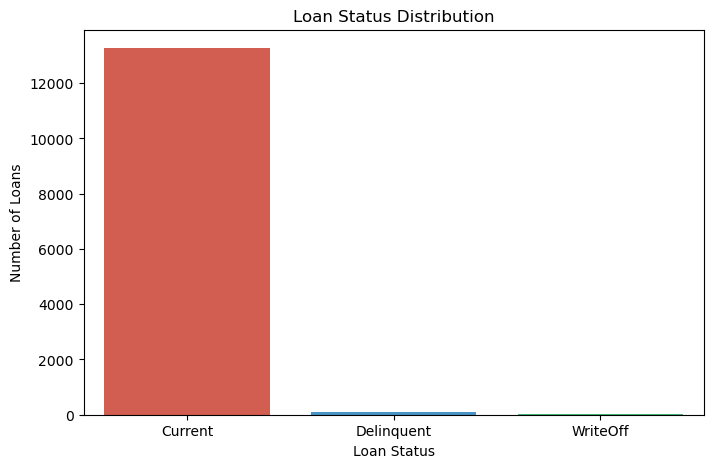

In [34]:
# 1. Loan Status Distribution

palette = ["#e74c3c", "#3498db", "#2ecc71"]  # Blue, Red, Green

plt.figure(figsize=(8, 5))
sns.countplot(x='Dlq_stat', data=data_june, palette=palette)
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Number of Loans')
plt.show()

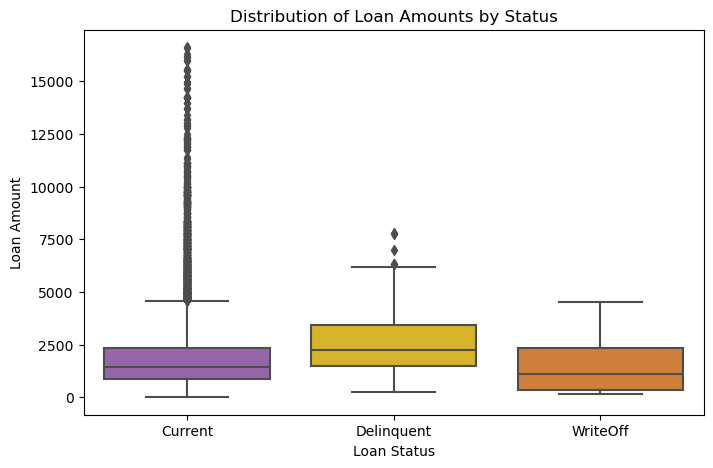

In [37]:
# 2. Loan Amount Distribution

palette = ["#9b59b6", "#f1c40f", "#e67e22"]  # Purple, Yellow, Orange

plt.figure(figsize=(8, 5))
sns.boxplot(x='Dlq_stat', y='amounts', data=data_june, palette=palette)
plt.title('Distribution of Loan Amounts by Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()


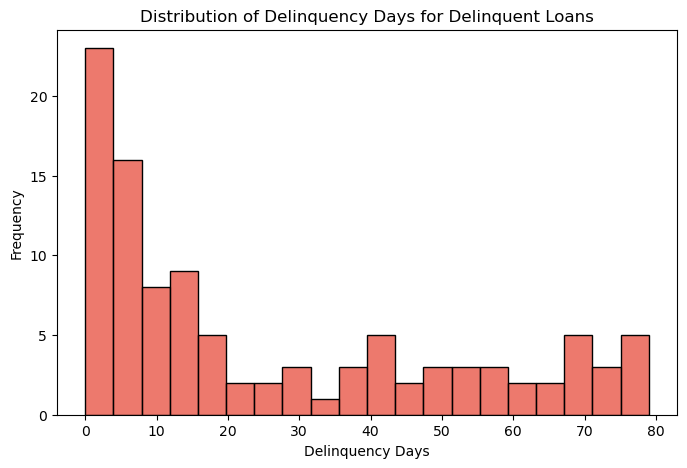

In [39]:
# Delinquency Days for Delinquent Loans

plt.figure(figsize=(8, 5))
sns.histplot(data_june[data_june['Dlq_stat'] == 'Delinquent']['Dlq_days'].dropna(), bins=20, kde=False, color="#e74c3c")
plt.title('Distribution of Delinquency Days for Delinquent Loans')
plt.xlabel('Delinquency Days')
plt.ylabel('Frequency')
plt.show()


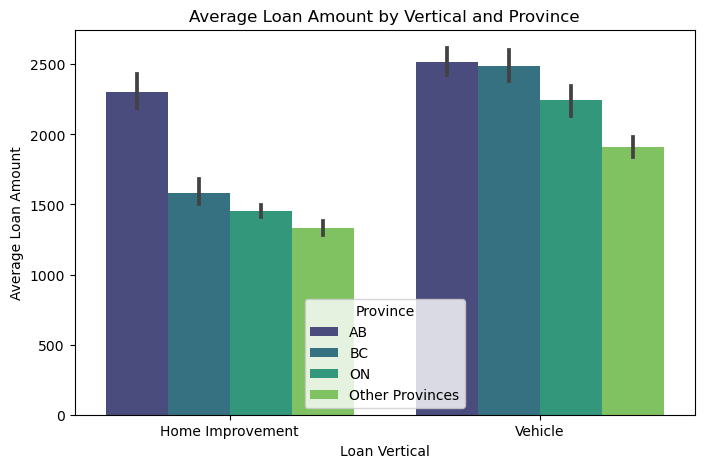

In [41]:
# 4. Loan Amount by Vertical and Province

palette = sns.color_palette("viridis", n_colors=data_june['Province1'].nunique())

plt.figure(figsize=(8, 5))
sns.barplot(x='Vertical1', y='amounts', hue='Province1', data=data_june, palette=palette)
plt.title('Average Loan Amount by Vertical and Province')
plt.xlabel('Loan Vertical')
plt.ylabel('Average Loan Amount')
plt.legend(title='Province')
plt.show()



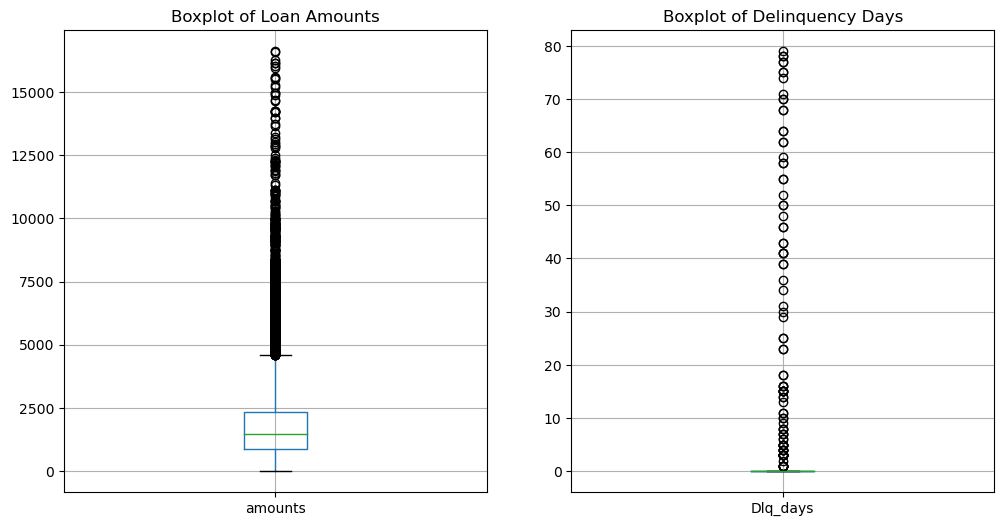

In [21]:
#check for outliers


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
data_june.boxplot(column=['amounts'])
plt.title('Boxplot of Loan Amounts')

plt.subplot(1, 2, 2)
data_june.boxplot(column=['Dlq_days'])
plt.title('Boxplot of Delinquency Days')
plt.show()


In [31]:
# Create a backup of the DataFrame
data_june_backup = data_june.copy()


# Dashboard Creation 

In [ ]:
#please find attach dashboard from tableau